In [1]:
import numpy as np
import pandas as pd

In [108]:
ds = pd.read_csv('train.csv')

In [109]:
print(ds.shape)
print(ds.info())

(700, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None


In [110]:
#ds['y'] = pd.to_numeric(ds['y'], errors='coerce').fillna(0).astype(int)

In [111]:
q = ds["x"].quantile(0.99)
print(q)
ds = ds[ds['x'] < q]

100.0


In [112]:
print(ds.describe())
print(ds.corr())

                x           y
count  690.000000  690.000000
mean    49.362319   49.279690
std     28.570170   28.711415
min      0.000000   -3.839981
25%     25.000000   24.668086
50%     49.000000   48.757174
75%     74.000000   73.805870
max     99.000000  102.495945
          x         y
x  1.000000  0.995254
y  0.995254  1.000000


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0xffff7298d7e0>,
 'caps': [<matplotlib.lines.Line2D at 0xffff7298dd20>,
 'boxes': [<matplotlib.lines.Line2D at 0xffff7298d540>],
 'medians': [<matplotlib.lines.Line2D at 0xffff7298e260>],
 'fliers': [<matplotlib.lines.Line2D at 0xffff7298e500>],
 'means': []}

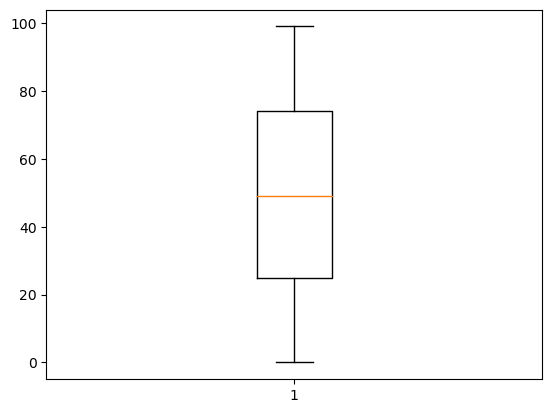

In [114]:
plt.boxplot(ds['x'])

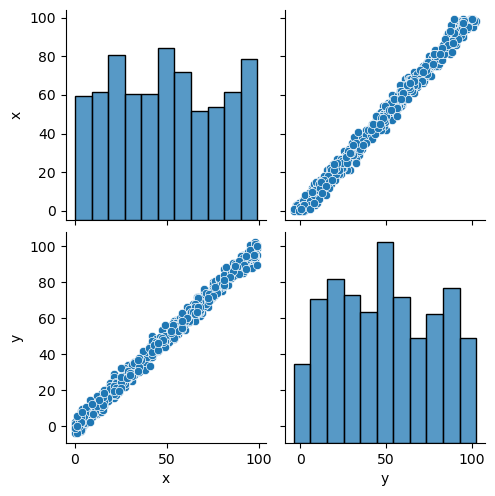

In [115]:
sns.pairplot(ds, kind='scatter')

In [116]:
X_train = ds['x'].astype(int)
y_train = pd.to_numeric(ds['y'], errors='coerce').fillna(0).astype(int)

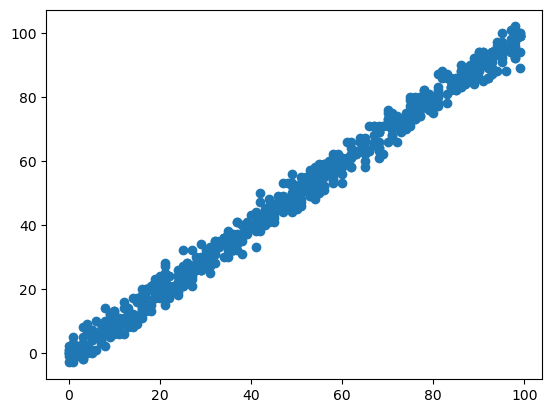

In [117]:
plt.scatter(X_train, y_train)

In [136]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [119]:
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_sm)
lm_model = lm.fit()

In [120]:
print(lm_model.params)
lm_model.summary()

const   -0.554712
x        1.000022
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.248e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        13:04:24   Log-Likelihood:                -1684.9
No. Observations:                 690   AIC:                             3374.
Df Residuals:                     688   BIC:                             3383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5547      0.212     -2.619      0.009      -0.971      -0.139
x              1.0000      0.004    269.225      0.000       0.993       1.007
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.422
Skew:                           0.005   Prob(JB):                        0.810
Kurtosis:                       2.879   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
y_train_pred =  0.993 * X_train -0.5547

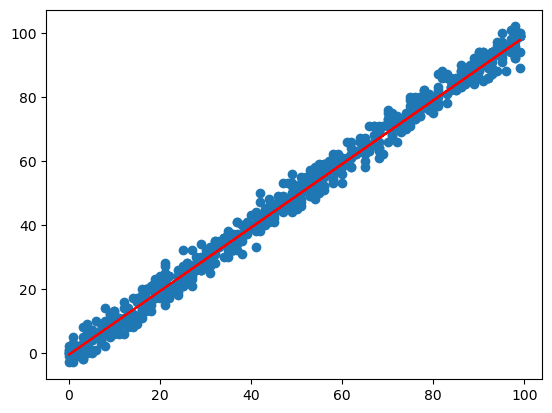

In [124]:
plt.scatter(X_train, y_train) 
plt.plot(X_train, y_train_pred, 'r')

In [125]:
res = y_train - y_train_pred

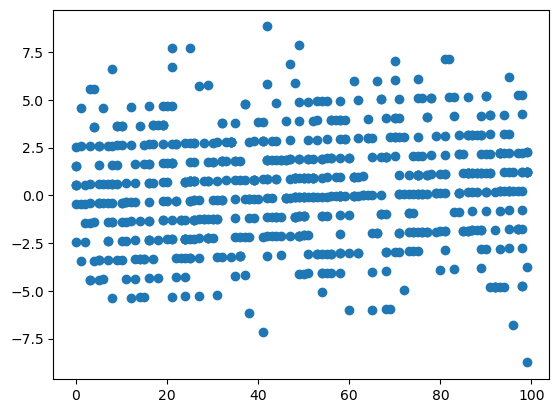

In [127]:
plt.scatter(X_train, res)

(array([  2.,  13.,  37., 127., 135., 164., 119.,  72.,  15.,   6.]),
 array([-8.7523, -6.9922, -5.2321, -3.472 , -1.7119,  0.0482,  1.8083,
         3.5684,  5.3285,  7.0886,  8.8487]),
 <BarContainer object of 10 artists>)

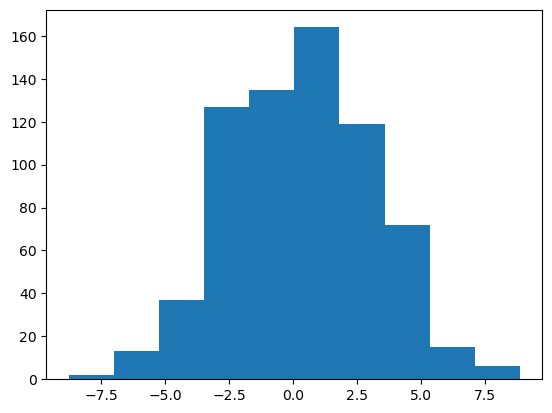

In [129]:
plt.hist(res)

In [140]:
print(mean_squared_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

7.897310449420286
0.9904024273678322


In [141]:
df = pd.read_csv('test.csv')

In [147]:
X_test = df['x']
y_test = df['y']
X_test_sm = sm.add_constant(X_test)

In [148]:
y_test_pred = lm_model.predict(X_test_sm)

In [149]:
res = y_test - y_test_pred

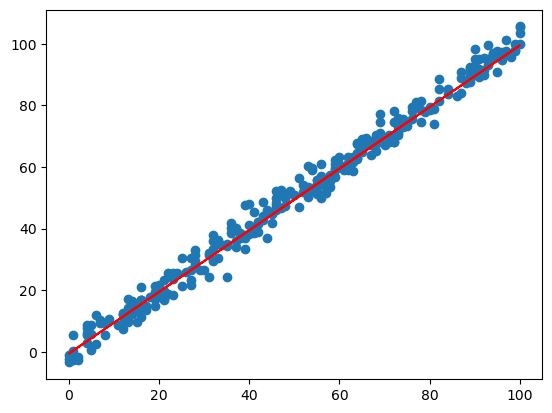

In [151]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

/tmp/ipykernel_54840/2154591961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

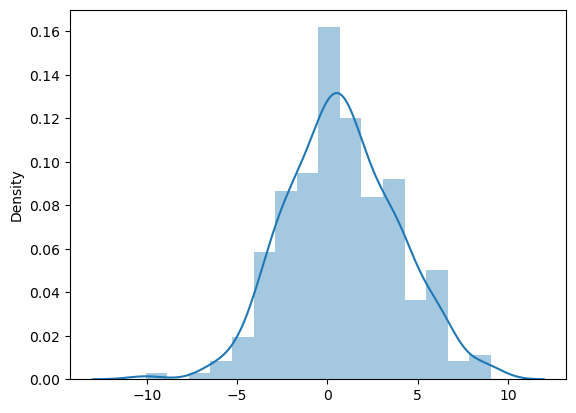

In [171]:
sns.distplot(res)

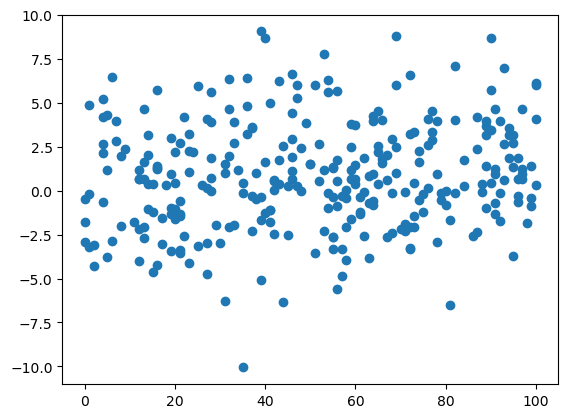

In [153]:
plt.scatter(X_test, res)

In [156]:
from sklearn.linear_model import LinearRegression

In [161]:
X_train_lm = X_train.values.reshape(-1,1)
y_train_lm = y_train.values.reshape(-1,1)

In [165]:
lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [166]:
y_pred = lm.predict(X_train_lm)

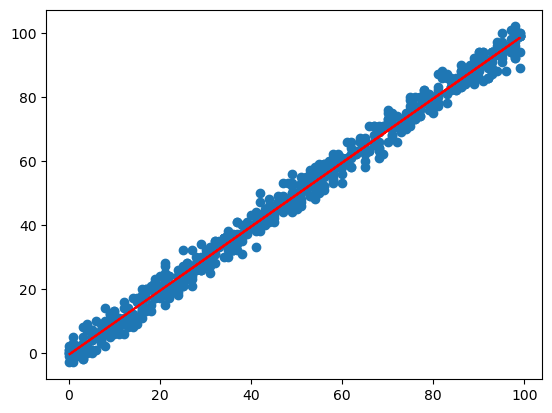

In [170]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'r')